# Problem Statement
Aging is a complex biological process influenced by genetic, environmental, and epigenetic factors. DNA methylation at specific CpG sites has been shown to correlate with chronological age, leading to the development of epigenetic clocks. However, accurately determining an individual's age from biological samples remains a challenge in aging research, forensic science, and healthcare. Traditional methods often rely on physical or medical assessments, which may not always be precise or feasible. This project aims to develop a machine learning model to estimate an individual's age based on the methylation status of 1000 CpG sites. By doing so, it provides a more accurate measure of biological age, which has critical applications in understanding aging-related diseases, forensic identification, and assessing disease risk. In forensic science, such a model can aid in age estimation from biological evidence, assisting in criminal investigations and missing person cases. In healthcare, it can differentiate between biological and chronological age, helping detect premature aging and assess health risks.

# Research Question
* How accurately can we predict the chronological age of an individual using DNA methylation data from 1000 CpG sites?
* Which regression model performs best for age prediction in this dataset?
* Is there a trade-off between model simplicity (fewer features) and accuracy?
* How does reducing the number of features affect the model’s predictive performance (as measured by MSE)?

# Specific Objectives
* Develop a Regression Model for Age Prediction
* Compare Model Performance
* Investigate Feature Selection Impact
* Evaluate the Trade-off Between Simplicity and Accuracy
* Identify Key CpG Sites for Age Prediction

# Workflow
* Data Preprocessing
* Feature Selection & Engineering
* Model Development
* Model Evaluation
* Biological Interpretation & Insights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/kaggle/input/cpgmeth2age/CpGmeth2Age.csv")
df.head()

,Unnamed: 0,Age,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,cg02397514,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
0,1,20.786301,0.020558,0.078206,0.012047,0.130174,0.017474,0.754652,0.240184,0.014799,...,0.878861,0.024453,0.063018,0.771269,0.046452,0.036543,0.044264,0.957370,0.974147,0.120803
1,2,18.158904,0.022684,0.057089,0.009227,0.108734,0.013298,0.720622,0.300895,0.008603,...,0.867806,0.026435,0.046670,0.812142,0.044600,0.027126,0.047299,0.976497,0.981848,0.152501
2,3,57.868493,0.021980,0.081262,0.011758,0.121616,0.015789,0.810495,0.221584,0.011403,...,0.705278,0.252450,0.205701,0.672509,0.063002,0.038100,0.332500,0.461237,0.963953,0.006958
3,4,19.706849,0.022296,0.118663,0.009513,0.181430,0.012658,0.812546,0.355360,0.010078,...,0.752295,0.311982,0.245013,0.793210,0.060584,0.026386,0.313625,0.500961,0.973289,0.006869
4,5,61.956164,0.018492,0.086863,0.009818,0.156035,0.016777,0.746922,0.329234,0.013584,...,0.870432,0.028201,0.042863,0.762644,0.056518,0.036575,0.055431,0.977533,0.980127,0.179412


In [3]:
columns = df.columns.tolist()
columns[0]

'Unnamed: 0'

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,Age,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,cg02397514,cg08122545,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
0,20.786301,0.020558,0.078206,0.012047,0.130174,0.017474,0.754652,0.240184,0.014799,0.018231,...,0.878861,0.024453,0.063018,0.771269,0.046452,0.036543,0.044264,0.957370,0.974147,0.120803
1,18.158904,0.022684,0.057089,0.009227,0.108734,0.013298,0.720622,0.300895,0.008603,0.012613,...,0.867806,0.026435,0.046670,0.812142,0.044600,0.027126,0.047299,0.976497,0.981848,0.152501
2,57.868493,0.021980,0.081262,0.011758,0.121616,0.015789,0.810495,0.221584,0.011403,0.015571,...,0.705278,0.252450,0.205701,0.672509,0.063002,0.038100,0.332500,0.461237,0.963953,0.006958
3,19.706849,0.022296,0.118663,0.009513,0.181430,0.012658,0.812546,0.355360,0.010078,0.017371,...,0.752295,0.311982,0.245013,0.793210,0.060584,0.026386,0.313625,0.500961,0.973289,0.006869
4,61.956164,0.018492,0.086863,0.009818,0.156035,0.016777,0.746922,0.329234,0.013584,0.012814,...,0.870432,0.028201,0.042863,0.762644,0.056518,0.036575,0.055431,0.977533,0.980127,0.179412


In [6]:
df = df[~(df["Age"] < 0)]

In [7]:
df.shape

(78, 27579)

In [8]:
df["Age"] = df["Age"].round()

In [9]:
df["Age"]

0      21.0
1      18.0
2      58.0
3      20.0
4      62.0
       ... 
102     6.0
103    42.0
105    11.0
106     1.0
107    84.0
Name: Age, Length: 78, dtype: float64

In [10]:
df["Age"] = df["Age"].astype(int)

In [11]:
df.head()

,Age,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,cg02397514,cg08122545,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
0,21,0.020558,0.078206,0.012047,0.130174,0.017474,0.754652,0.240184,0.014799,0.018231,...,0.878861,0.024453,0.063018,0.771269,0.046452,0.036543,0.044264,0.957370,0.974147,0.120803
1,18,0.022684,0.057089,0.009227,0.108734,0.013298,0.720622,0.300895,0.008603,0.012613,...,0.867806,0.026435,0.046670,0.812142,0.044600,0.027126,0.047299,0.976497,0.981848,0.152501
2,58,0.021980,0.081262,0.011758,0.121616,0.015789,0.810495,0.221584,0.011403,0.015571,...,0.705278,0.252450,0.205701,0.672509,0.063002,0.038100,0.332500,0.461237,0.963953,0.006958
3,20,0.022296,0.118663,0.009513,0.181430,0.012658,0.812546,0.355360,0.010078,0.017371,...,0.752295,0.311982,0.245013,0.793210,0.060584,0.026386,0.313625,0.500961,0.973289,0.006869
4,62,0.018492,0.086863,0.009818,0.156035,0.016777,0.746922,0.329234,0.013584,0.012814,...,0.870432,0.028201,0.042863,0.762644,0.056518,0.036575,0.055431,0.977533,0.980127,0.179412


In [12]:
df.duplicated().sum()

0

In [13]:
missing = df.isna().sum()
missing_columns = missing[missing > 0]
missing_columns_df = missing_columns.to_frame(name="Missing_values")
missing_columns_df

,Missing_values


In [14]:
df.describe()

,Age,cg26211698,cg03790787,cg04672450,cg14324200,cg04485075,cg19923810,cg21832150,cg02397514,cg08122545,...,cg06532147,cg06659128,cg07311845,cg03515901,cg08455548,cg22415432,cg20401549,cg15812957,cg21825364,cg23654549
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,36.025641,0.025943,0.091692,0.013966,0.134434,0.021649,0.759146,0.297841,0.014621,0.021463,...,0.813573,0.155444,0.134658,0.766343,0.062142,0.036220,0.169539,0.825664,0.973403,0.100054
std,24.278136,0.008709,0.022569,0.004681,0.037288,0.010054,0.051761,0.091295,0.005253,0.009111,...,0.074963,0.135055,0.075049,0.059034,0.009505,0.008412,0.131548,0.206061,0.008118,0.094857
min,0.000000,0.013304,0.050008,0.005251,0.030784,0.009369,0.615981,0.069261,0.007151,0.008875,...,0.590256,0.014499,0.038091,0.616743,0.044600,0.011352,0.024594,0.392934,0.953913,0.005128
25%,16.250000,0.019196,0.078656,0.010581,0.112698,0.014358,0.729862,0.236802,0.010593,0.015005,...,0.755377,0.030967,0.062757,0.732964,0.056432,0.032122,0.050183,0.585128,0.968692,0.008307
50%,38.500000,0.023117,0.088856,0.013234,0.132117,0.017887,0.747796,0.319764,0.012969,0.018435,...,0.834692,0.044934,0.122019,0.776203,0.060740,0.036559,0.067685,0.958796,0.974344,0.081026
75%,58.000000,0.031191,0.100621,0.016206,0.161775,0.025940,0.793418,0.362661,0.016542,0.025684,...,0.875760,0.290343,0.204529,0.812330,0.067103,0.039570,0.296850,0.971295,0.979018,0.178590
max,84.000000,0.048829,0.161116,0.025177,0.205996,0.047412,0.897253,0.462352,0.027549,0.045089,...,0.927798,0.402717,0.268506,0.844936,0.091766,0.060507,0.415172,0.980822,0.986731,0.340384


In [15]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Data Spliting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62, 27578)
(16, 27578)
(62,)
(16,)


# Preprocessing

# Building a Baseline Model

In [18]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

def model_building(x_train, y_train, x_test, y_test):
  # Linear Regression Model
  model_lr.fit(x_train, y_train)
  y_pred_lr = model_lr.predict(x_test)
  MSE = mean_squared_error(y_test, y_pred_lr)
  RMSE = np.sqrt(MSE)
  R2_Score = r2_score(y_test, y_pred_lr)
  print("Linear Regression Model")
  print("MSE: ", MSE)
  print("RMSE: ", RMSE)
  print("R2 Score: ", R2_Score)

  # Random Forest Regressor
  model_rf.fit(x_train, y_train)
  y_pred_rf = model_rf.predict(x_test)
  MSE = mean_squared_error(y_test, y_pred_rf)
  RMSE = np.sqrt(MSE)
  R2_Score = r2_score(y_test, y_pred_rf)
  print("------------------------------")
  print("Random Forest Regression Model")
  print("MSE: ", MSE)
  print("RMSE: ", RMSE)
  print("R2 Score: ", R2_Score)
  


In [20]:
model_building(X_train, y_train, X_test, y_test)

Linear Regression Model
MSE:  97.65504825366648
RMSE:  9.882056883749783
R2 Score:  0.872823643123802
------------------------------
Random Forest Regression Model
MSE:  122.38440625000004
RMSE:  11.062748584777657
R2 Score:  0.8406185527152485


# Feature Selection and Optimized Model Building

In [21]:
def feature_selection_model_building(x_train, x_test, y_train, y_test, model_type):
    no_features = [90, 80, 70, 60, 50, 40, 30, 20, 10]
    MSE, RMSE, R2_Score = [], [], []
    important_features = {}

    if model_type == "linear":
        base_model = LinearRegression()
        selected_features_dict = {}  

        for i in no_features:
            rfe = RFE(estimator=base_model, n_features_to_select=i, step=250) 
            rfe.fit(x_train, y_train)
            selected_features_dict[i] = x_train.columns[rfe.support_]

    elif model_type == "random_forest":
        base_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        base_model.fit(x_train, y_train)
        feature_importances = pd.Series(base_model.feature_importances_, index=x_train.columns)
        feature_importances = feature_importances.sort_values(ascending=False)

    for i in no_features:
        if model_type == "random_forest":
            selected_features = feature_importances.iloc[:i].index 
        else:
            selected_features = selected_features_dict[i]

        x_train_selected = x_train[selected_features]
        x_test_selected = x_test[selected_features]

        base_model.fit(x_train_selected, y_train)
        y_pred = base_model.predict(x_test_selected)

        MSE.append(mean_squared_error(y_test, y_pred))
        RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        R2_Score.append(r2_score(y_test, y_pred))
        important_features[i] = list(selected_features)

    results = pd.DataFrame({
        "No. of Features": no_features,
        "MSE": MSE,
        "RMSE": RMSE,
        "R2 Score": R2_Score
    })

    return results, important_features


In [22]:
LR_result, LR_important_features = feature_selection_model_building(X_train, X_test, y_train, y_test, "linear")

In [23]:
# This table shows model evaluation metrics for different numbers of features for a Linear Regression Model
# No. of Features: Number of input features used in the model
# MSE: Mean Squared Error (lower is better)
# RMSE: Root Mean Squared Error (lower is better)
# R2 Score: The proportion of variance explained by the model (higher is better)

LR_result.sort_values("MSE", ascending=True)

,No. of Features,MSE,RMSE,R2 Score
7,20,52.909648,7.273902,0.931096
8,10,62.006748,7.874436,0.919248
6,30,87.891747,9.375060,0.885538
0,90,117.635060,10.845970,0.846804
3,60,144.468852,12.019520,0.811858
1,80,148.698477,12.194198,0.806350
5,40,163.303429,12.779023,0.787330
4,50,171.109621,13.080888,0.777164
2,70,179.987876,13.415956,0.765601


In [25]:
RF_result, RF_important_features = feature_selection_model_building(X_train, X_test, y_train, y_test, "random_forest")

In [26]:
# This table shows model evaluation metrics for different numbers of features for a Random Forest Regression Model
# No. of Features: Number of input features used in the model
# MSE: Mean Squared Error (lower is better)
# RMSE: Root Mean Squared Error (lower is better)
# R2 Score: The proportion of variance explained by the model (higher is better)
RF_result.sort_values("MSE", ascending=True)

,No. of Features,MSE,RMSE,R2 Score
7,20,79.978163,8.943051,0.895844
6,30,85.214262,9.231157,0.889025
8,10,97.948725,9.896905,0.872441
2,70,99.638813,9.981924,0.870240
5,40,100.468819,10.023414,0.869159
4,50,102.241737,10.111466,0.866850
3,60,103.913737,10.193809,0.864673
1,80,105.207913,10.257091,0.862988
0,90,109.411019,10.459972,0.857514


# Optimized Model Evaluation

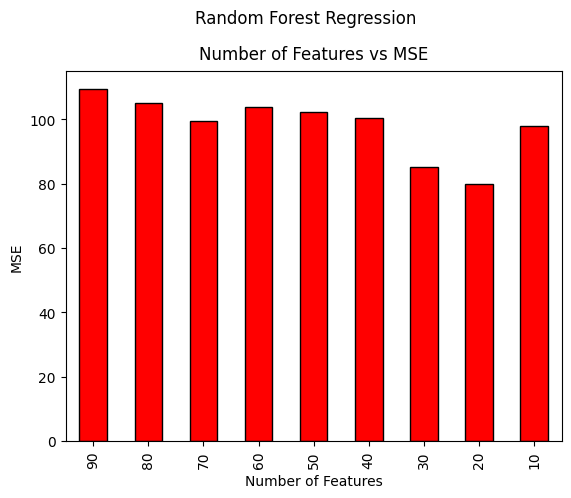

In [27]:
RF_result.plot(x="No. of Features", y="MSE", kind="bar", legend=False, color="red",edgecolor="black")
plt.xlabel("Number of Features", y=1.5)
plt.ylabel("MSE")
plt.title("Number of Features vs MSE", y=1.01)
plt.suptitle("Random Forest Regression", y=1.01)
plt.show()


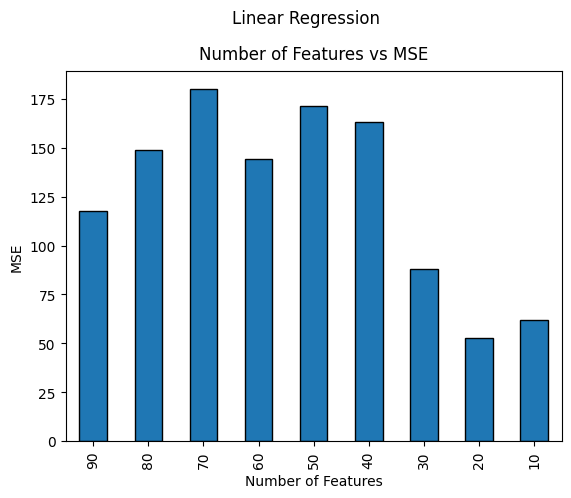

In [28]:
LR_result.plot(x="No. of Features", y="MSE", kind="bar", legend=False, edgecolor="black")
plt.xlabel("Number of Features", y = 1.5)
plt.ylabel("MSE")
plt.title("Number of Features vs MSE", y=1.01)
plt.suptitle("Linear Regression", y=1.01)
plt.show()


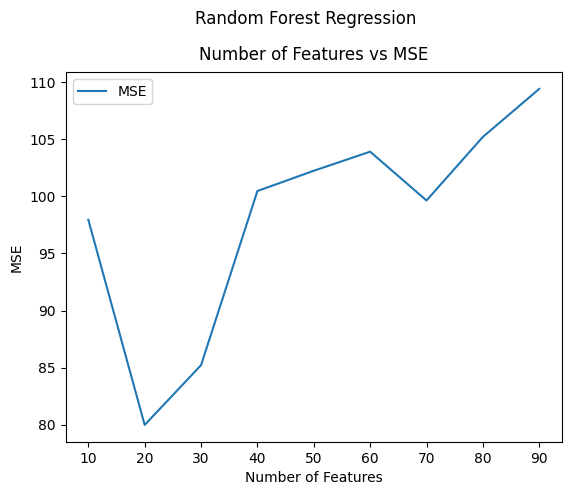

In [29]:
RF_result.plot(x="No. of Features", y="MSE", kind="line")
plt.xlabel("Number of Features", y = 1.5)
plt.ylabel("MSE")
plt.title("Number of Features vs MSE", y=1.01)
plt.suptitle("Random Forest Regression", y=1.01)
plt.show()

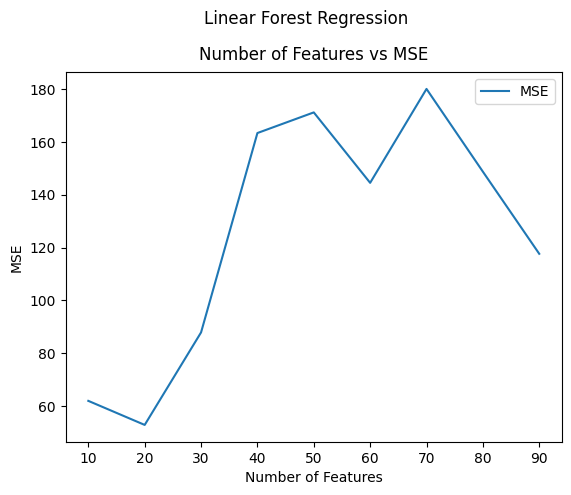

In [30]:
LR_result.plot(x="No. of Features", y="MSE", kind="line")
plt.xlabel("Number of Features", y = 1.5)
plt.ylabel("MSE")
plt.title("Number of Features vs MSE", y=1.01)
plt.suptitle("Linear Forest Regression", y=1.01)
plt.show()

In [35]:
LR_top_20_important_features = list(LR_important_features[20])
RF_top_20_important_features = list(RF_important_features[20])

In [36]:
LR_top_20_important_features

['cg16076328',
 'cg19352038',
 'cg06821120',
 'cg14189571',
 'cg05890484',
 'cg22736354',
 'cg25226247',
 'cg20748065',
 'cg07740640',
 'cg02512860',
 'cg03924115',
 'cg21120249',
 'cg21019522',
 'cg07829804',
 'cg01443630',
 'cg06144905',
 'cg26927807',
 'cg23878206',
 'cg03562120',
 'cg20244073']

In [37]:
RF_top_20_important_features

['cg22736354',
 'cg01644850',
 'cg06144905',
 'cg25136310',
 'cg00548268',
 'cg18108623',
 'cg03664992',
 'cg08370996',
 'cg11432797',
 'cg19996355',
 'cg14127659',
 'cg06821120',
 'cg14121103',
 'cg03924115',
 'cg17655614',
 'cg10705800',
 'cg10287137',
 'cg00075967',
 'cg08912400',
 'cg05135288']

In [38]:
common_features = list(set(RF_top_20_important_features) & set(LR_top_20_important_features))

In [39]:
common_features

['cg06144905', 'cg03924115', 'cg22736354', 'cg06821120']